<a href="https://colab.research.google.com/github/nibinkjoseph/Insurance-Prediction/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import datetime

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [7]:
df = pd.read_csv("loan-train.csv")
df_test = pd.read_csv("loan-test.csv")

In [8]:
"""Loan_ID --------------> Unique Loan ID.
Gender --------------> Male/ Female (cinsiyet)
Married --------------> Applicant married (medeni hali) (Y/N)
Dependents ------------> Number of dependents (bakması gereken kişi sayısı)
Education -------------> Applicant Education (egitim durumu) (Graduate/ Under Graduate)
Self_Employed ---------> Self-employed (kendi işinde çalışan) (Y/N)
ApplicantIncome -------> Applicant income (basvuru yapanın geliri)
CoapplicantIncome -----> Coapplicant income (basvuru yapanın eşinin geliri)
LoanAmount -----------> Loan amount in thousands (1 bin karsı odeditleri miktar)
Loan_Amount_Term ------> Term of a loan in months ( kaç aylık )
Credit_History --------> Credit history meets guidelines (kredi gecmişi kosuları saglıyor mu,kara liste )
Property_Area ---------> Urban/ Semi-Urban/ Rural (evlerin mekanları)
Loan_Status -----------> Loan approved (Y/N) (kredi onay)"""

'Loan_ID --------------> Unique Loan ID.\nGender --------------> Male/ Female (cinsiyet)\nMarried --------------> Applicant married (medeni hali) (Y/N)\nDependents ------------> Number of dependents (bakması gereken kişi sayısı)\nEducation -------------> Applicant Education (egitim durumu) (Graduate/ Under Graduate)\nSelf_Employed ---------> Self-employed (kendi işinde çalışan) (Y/N)\nApplicantIncome -------> Applicant income (basvuru yapanın geliri)\nCoapplicantIncome -----> Coapplicant income (basvuru yapanın eşinin geliri)\nLoanAmount -----------> Loan amount in thousands (1 bin karsı odeditleri miktar)\nLoan_Amount_Term ------> Term of a loan in months ( kaç aylık )\nCredit_History --------> Credit history meets guidelines (kredi gecmişi kosuları saglıyor mu,kara liste )\nProperty_Area ---------> Urban/ Semi-Urban/ Rural (evlerin mekanları)\nLoan_Status -----------> Loan approved (Y/N) (kredi onay)'

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df_train = df.copy()
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df_train.shape

(614, 13)

In [12]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df_train[df_train.duplicated() == True]

#No duplicate data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [15]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
#Code to find numeric data
numeric_data = df_train.select_dtypes(include = np.number)
numeric_col = numeric_data.columns
numeric_data.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [17]:
#code to find categorical data
categorical_data = df_train.select_dtypes(exclude= np.number)
categorical_col = categorical_data.columns
categorical_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


Missing Values

In [18]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Percentage of missing values

In [19]:
def missing_data(data):
  total = data.isnull().sum().sort_values(ascending = False)
  percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)

  return pd.concat([total, percent], axis = 1, keys=['total', 'percent'])

missing_data(df_train)  


,total,percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [20]:
#Now we are creating a copy of df_train to clean the file

In [21]:
df_train_clean = df_train.copy()
df_train_clean = df_train_clean.dropna()

In [22]:
df_train_clean.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
#droping loan_id

In [24]:
df_train_clean.drop(['Loan_ID'], inplace= True, axis= 1)
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [25]:
df_train_clean.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [26]:
df_train_clean['Dependents'].nunique()

4

In [27]:
df_train_clean['Property_Area'].nunique()

3

In [28]:
#unique values
{column: list(df_train_clean[column].unique()) for column in df_train_clean.select_dtypes('object').columns}

{'Dependents': ['1', '0', '2', '3+'],
 'Education': ['Graduate', 'Not Graduate'],
 'Gender': ['Male', 'Female'],
 'Loan_Status': ['N', 'Y'],
 'Married': ['Yes', 'No'],
 'Property_Area': ['Rural', 'Urban', 'Semiurban'],
 'Self_Employed': ['No', 'Yes']}

In [29]:
#value counts
a = df_train_clean['Gender'].value_counts()
b = df_train_clean['Married'].value_counts()
d = df_train_clean['Education'].value_counts()
e = df_train_clean['Self_Employed'].value_counts()


In [30]:
print(a)
print('\n')
print(b)
print('\n')
print(d)
print('\n')
print(e)


Male      394
Female     86
Name: Gender, dtype: int64


Yes    311
No     169
Name: Married, dtype: int64


Graduate        383
Not Graduate     97
Name: Education, dtype: int64


No     414
Yes     66
Name: Self_Employed, dtype: int64


In [31]:
df_train_clean.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

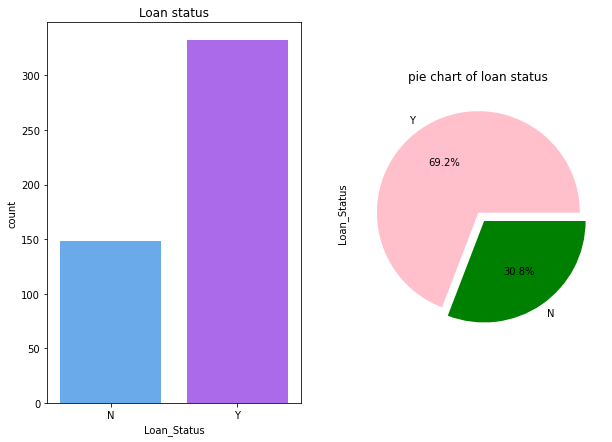

In [32]:
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Loan_Status'],palette = 'cool')
plt.title("Loan status")

plt.subplot(1,2,2)
count = df_train_clean['Loan_Status'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['pink', 'green'], figsize= (10,7), explode= [0,0.1], title = "pie chart of loan status")

In [33]:
df_train_clean.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

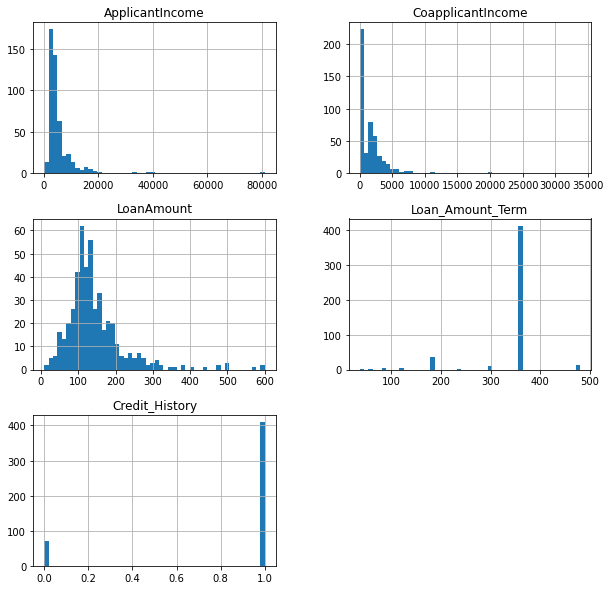

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train_clean.hist(bins= 50, figsize= (10,10))
plt.show()

In [35]:
#plot on Gender

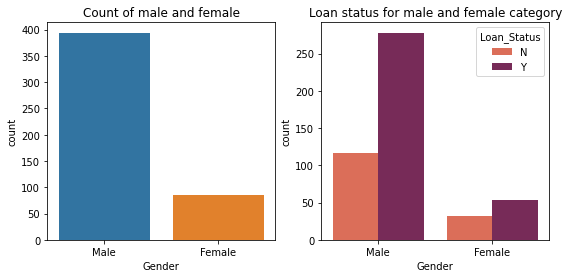

Male      394
Female     86
Name: Gender, dtype: int64

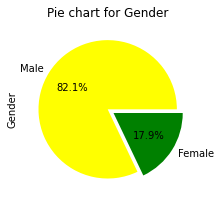

In [36]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Gender'])
plt.title("Count of male and female")



plt.subplot(1,2,2)
sns.countplot(df_train_clean['Gender'], hue= df_train_clean['Loan_Status'], palette= "rocket_r")
plt.title("Loan status for male and female category")
plt.show()

plt.subplot(2,1,1)
count = df_train_clean['Gender'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['yellow', 'green'], figsize= (10,7), explode= [0,0.1], title = "Pie chart for Gender")

a = df_train_clean['Gender'].value_counts()
a

In [37]:
df_train_clean.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
#PLOT ON MARRIED

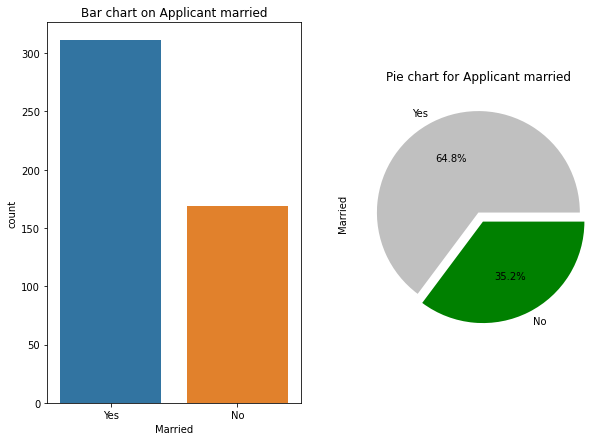

In [39]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Married'])
plt.title("Bar chart on Applicant married")

plt.subplot(1,2,2)
count = df_train_clean['Married'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['silver', 'green'], figsize= (10,7), explode= [0,0.1], title = "Pie chart for Applicant married")



In [40]:
#Insights

#64.8 % are married
#35.2% are unmarried

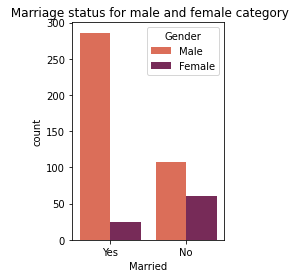

In [41]:
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Married'], hue= df_train_clean['Gender'], palette= "rocket_r")
plt.title(" Marriage status for male and female category")
plt.show()

Education

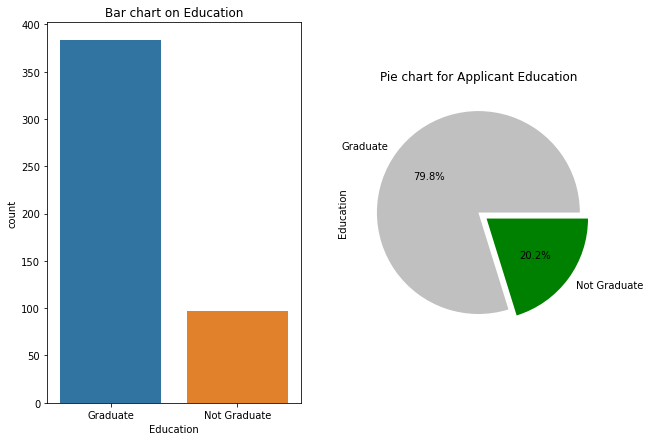

In [42]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Education'])
plt.title("Bar chart on Education")

plt.subplot(1,2,2)
count = df_train_clean['Education'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['silver', 'green'], figsize= (10,7), explode= [0,0.1], title = "Pie chart for Applicant Education")



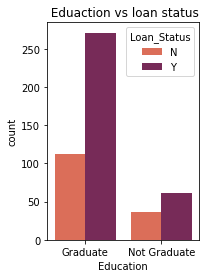

In [43]:
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Education'], hue= df_train_clean['Loan_Status'], palette= "rocket_r")
plt.title(" Eduaction vs loan status")
plt.show()

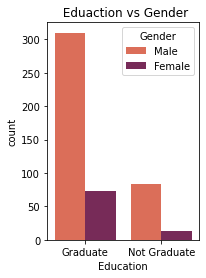

In [44]:
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Education'], hue= df_train_clean['Gender'], palette= "rocket_r")
plt.title(" Eduaction vs Gender")
plt.show()

In [45]:
df_train_clean.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
#Self-Employed

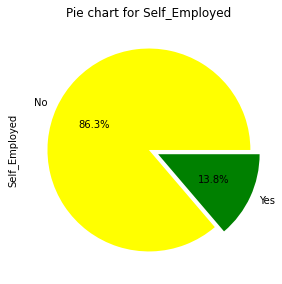

In [47]:
plt.subplot(1,2,1)
count = df_train_clean['Self_Employed'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['yellow', 'green'], figsize= (10,7), explode= [0,0.1], title = "Pie chart for Self_Employed")

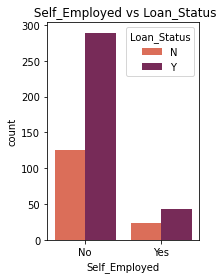

In [48]:
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Self_Employed'], hue= df_train_clean['Loan_Status'], palette= "rocket_r")
plt.title(" Self_Employed vs Loan_Status")
plt.show()

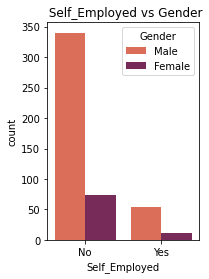

In [49]:
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Self_Employed'], hue= df_train_clean['Gender'], palette= "rocket_r")
plt.title(" Self_Employed vs Gender")
plt.show()

In [50]:
#Property Area

In [51]:
df_Property_Area=df_train_clean['Property_Area'].value_counts().to_frame().reset_index().rename(columns={'index':'Property_Area','Property_Area':'count'})
df_Property_Area

,Property_Area,count
0,Semiurban,191
1,Urban,150
2,Rural,139


In [52]:
#Applicant Income

In [53]:
df_train_clean.ApplicantIncome.describe().T

count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64

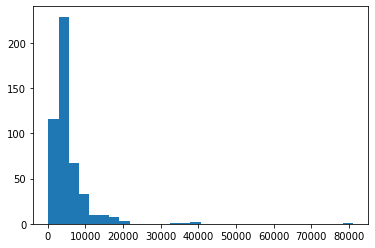

In [54]:
plt.hist(df_train_clean['ApplicantIncome'],bins=30);

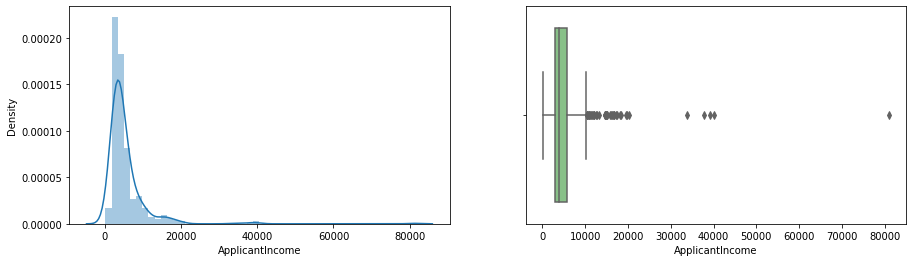

In [55]:
plt.figure(figsize= (15,4))
plt.subplot(1,2,1)
sns.distplot(df_train_clean['ApplicantIncome'])


plt.subplot(1,2,2)
sns.boxplot(df_train_clean['ApplicantIncome'], palette= 'Accent')

In [56]:
min_income=df_train_clean.ApplicantIncome.min()
max_income=df_train_clean.ApplicantIncome.max()
mean_income=df_train_clean.ApplicantIncome.mean()

print(min_income)
print(max_income)
print(mean_income)

150
81000
5364.23125


In [57]:
SE_Y_income=df_train_clean[df_train_clean["Self_Employed"]=="Yes"]
SE_N_income=df_train_clean[df_train_clean["Self_Employed"]=="No"]


minY_income=SE_Y_income.ApplicantIncome.min()
maxY_income=SE_Y_income.ApplicantIncome.max()
meanY_income=SE_Y_income.ApplicantIncome.mean()

minN_income=SE_N_income.ApplicantIncome.min()
maxN_income=SE_N_income.ApplicantIncome.max()
meanN_income=SE_N_income.ApplicantIncome.mean()

In [58]:
print("Self employed minimum income {}" .format(minY_income))
print("Self employed minimum income {}" .format(maxY_income))
print("Self employed mean income {}" .format(meanY_income))
print("Employed minimum income {}" .format(minN_income))
print("Employed maximum income {}" .format(maxN_income))
print(" Employed mean income income {}" .format(meanN_income))


Self employed minimum income 1000
Self employed minimum income 39147
Self employed mean income 7786.227272727273
Employed minimum income 150
Employed maximum income 81000
 Employed mean income income 4978.115942028986


In [59]:
df_property_area = df_train_clean['Property_Area'].value_counts().to_frame().reset_index(). rename(columns={'index':'Property_Area','Property_Area':'count'})
colors=['cyan','darkblue',"darkcyan"]


In [60]:
fig = go.Figure([go.Pie(labels= df_property_area['Property_Area'], values =  df_property_area['count'] ) ])

In [61]:
fig.update_traces(hoverinfo = 'label+percent' , textinfo = 'percent+value', values = df_Property_Area['count'])
fig.update_layout(title="Property Area Count",title_x=0.5)
fig.show()

,Property_Area,count
0,Semiurban,191
1,Urban,150
2,Rural,139


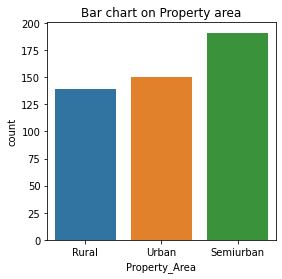

In [62]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Property_Area'])
plt.title("Bar chart on Property area")

df_Property_Area=df_train_clean['Property_Area'].value_counts().to_frame().reset_index().rename(columns={'index':'Property_Area','Property_Area':'count'})
df_Property_Area

In [63]:
fig = px.scatter(df_train_clean, x='ApplicantIncome', y='LoanAmount',color="Property_Area")
fig

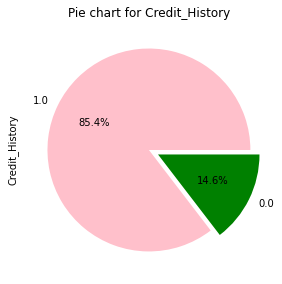

In [64]:
plt.subplot(1,2,1)
count = df_train_clean['Credit_History'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['pink', 'green'], figsize= (10,7), explode= [0,0.1], title = "Pie chart for Credit_History")

,Credit_History,count
0,1.0,410
1,0.0,70


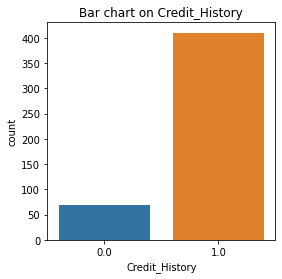

In [65]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(df_train_clean['Credit_History'])
plt.title("Bar chart on Credit_History")

df_Property_Area=df_train_clean['Credit_History'].value_counts().to_frame().reset_index().rename(columns={'index':'Credit_History','Credit_History':'count'})

df_Property_Area

In [66]:
df_train_clean.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [67]:
df_cm_train = df_train_clean.copy()

In [68]:
df_cm_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [69]:
df_cm_train['Gender'] = df_cm_train['Gender'].replace(['Male','Female'],[1,0])

In [70]:
df_cm_train['Married'] = df_cm_train['Married'].replace(['Yes','No'],[1,0])
df_cm_train['Dependents'] = df_cm_train['Dependents'].replace(['0','1','2'],[0,1,2])
df_cm_train['Dependents'] = df_cm_train['Dependents'].replace('3+' , 3)
df_cm_train['Education'] = df_cm_train['Education'].replace(['Graduate' , 'Not Graduate'],[1,0])
df_cm_train['Self_Employed'] = df_cm_train['Self_Employed'].replace(['Yes','No'],[1,0])
df_cm_train['Property_Area'] = df_cm_train['Property_Area'].replace(['Urban' ,'Rural' ,'Semiurban'],[0,1,2])
df_cm_train['Loan_Status'] = df_cm_train['Loan_Status'].replace(['Y','N'],[1,0])

In [71]:
df_cm_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [72]:
df_cm_train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [73]:
#Property_Area is having three values. so need to convert them into three features for better analysis

In [74]:
df_cm_train = pd.get_dummies(df_cm_train , columns = ['Property_Area'])

In [75]:
df_cm_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_0,Property_Area_1,Property_Area_2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1,0,0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0


In [76]:
#Correlation Matrix

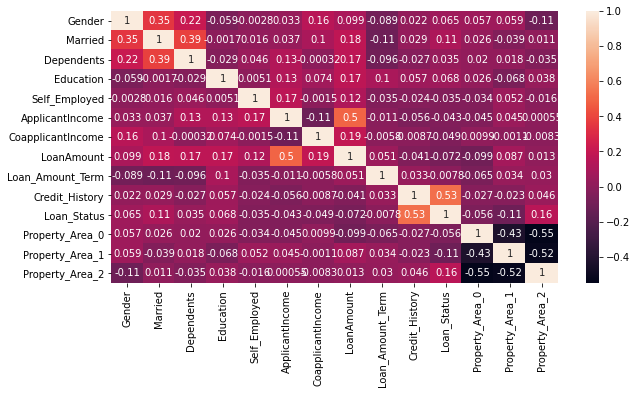

In [77]:
corr = df_cm_train.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True)
plt.show()

In [78]:
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [79]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [80]:
df_test.dropna(inplace= True) 

In [81]:
df_test.head(2) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [82]:
#Data Preprocessing

In [83]:
df_test['Gender'] = df_test['Gender'].replace(['Male','Female'],[1,0])

In [84]:
df_test['Married'] = df_test['Married'].replace(['Yes','No'],[1,0])
df_test['Dependents'] = df_test['Dependents'].replace(['0','1','2'],[0,1,2])
df_test['Dependents'] = df_test['Dependents'].replace('3+' , 3)
df_test['Education'] = df_test['Education'].replace(['Graduate' , 'Not Graduate'],[1,0])
df_test['Self_Employed'] = df_test['Self_Employed'].replace(['Yes','No'],[1,0])
df_test['Property_Area'] = df_test['Property_Area'].replace(['Urban' ,'Rural' ,'Semiurban'],[0,1,2])

In [85]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [86]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split

In [95]:
train= df_cm_train.drop(['Loan_Status'], axis=1)
train_target=df_cm_train['Loan_Status']

In [96]:
X_train,X_test,y_train,y_test = train_test_split(train, train_target, random_state = 0)

In [91]:
#Modelling


In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [93]:
#Decision treee

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
X_train, X_test, y_train, y_test = train_test_split(train,train_target, test_size=0.3, random_state= 124)

In [99]:
print(X_train.shape, X_test.shape)

(336, 13) (144, 13)


In [100]:
model= DecisionTreeClassifier()

In [101]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
prediction = model.predict(X_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

In [104]:
print (confusion_matrix(y_test, prediction))

[[27 15]
 [22 80]]


In [105]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59        42
           1       0.84      0.78      0.81       102

    accuracy                           0.74       144
   macro avg       0.70      0.71      0.70       144
weighted avg       0.76      0.74      0.75       144



In [106]:
#logistic regression

In [107]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_pred_loj = loj_model.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [110]:
accuracy_score(y_test, y_pred_loj)

0.8402777777777778

In [112]:
print("Training Accuracy :", loj_model.score(X_train, y_train))

print("Testing Accuracy :", loj_model.score(X_test, y_test))

Training Accuracy : 0.7916666666666666
Testing Accuracy : 0.8402777777777778


In [113]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()


0.8066666666666666

In [114]:
print(classification_report(y_test, y_pred_loj))

              precision    recall  f1-score   support

           0       0.95      0.48      0.63        42
           1       0.82      0.99      0.90       102

    accuracy                           0.84       144
   macro avg       0.89      0.73      0.77       144
weighted avg       0.86      0.84      0.82       144



In [116]:
#Random Forest Classifier

In [117]:
from sklearn.ensemble.forest import RandomForestClassifier

In [118]:
rf_model =RandomForestClassifier(n_estimators =150)

In [119]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
rf_prediction = rf_model.predict(X_test)

In [121]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.88      0.55      0.68        42
           1       0.84      0.97      0.90       102

    accuracy                           0.85       144
   macro avg       0.86      0.76      0.79       144
weighted avg       0.85      0.85      0.83       144



In [122]:
print(confusion_matrix(y_test, rf_prediction))

[[23 19]
 [ 3 99]]


In [123]:
#Feature Importance

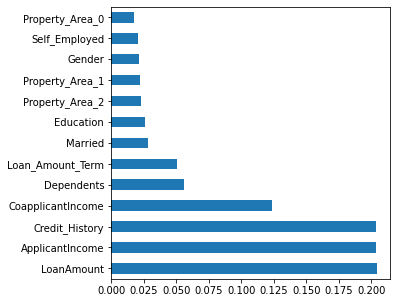

In [124]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
#feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

In [ ]:
#Hyper parameter tuning

In [125]:
#LGBM CLASSIFIER

In [126]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import roc_auc_score

In [127]:
model=LGBMClassifier(colsample_bytree=0.5, learning_rate=0.03,
                     n_estimators=600, objective='binary', reg_alpha=0.1,
                     random_state=101,reg_lambda=0.8)

model.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.03, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=600, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=101, reg_alpha=0.1, reg_lambda=0.8, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [128]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores=cross_val_score(model, X_test, y_test, cv=cv,scoring='roc_auc')
scores.mean()

0.5673540826989103

In [129]:
val_pred= model.predict_proba(X_test)[:,1]

In [130]:
val_pred

array([0.95565417, 0.97459189, 0.91201585, 0.19284208, 0.00460914,
       0.69703436, 0.98036886, 0.2064624 , 0.64010579, 0.58663941,
       0.97145808, 0.9219448 , 0.01714926, 0.80604578, 0.00632076,
       0.83891738, 0.92245968, 0.02543566, 0.92841325, 0.9366293 ,
       0.93303671, 0.80305262, 0.90403997, 0.46639976, 0.76131425,
       0.98761465, 0.77417577, 0.17279968, 0.87380449, 0.29303872,
       0.96012747, 0.38575075, 0.96701492, 0.48542859, 0.73189881,
       0.99697238, 0.90451216, 0.05569639, 0.9217823 , 0.68964485,
       0.87350313, 0.03075789, 0.86924759, 0.77055256, 0.43680592,
       0.1137181 , 0.96780854, 0.97876081, 0.06968908, 0.99217832,
       0.7100907 , 0.56910302, 0.95915066, 0.9198457 , 0.97366851,
       0.89795596, 0.9520012 , 0.92000401, 0.35526226, 0.99284465,
       0.30517607, 0.98575011, 0.98099768, 0.97663416, 0.91655996,
       0.98692111, 0.23837071, 0.71014882, 0.91061895, 0.66252603,
       0.98692492, 0.85732829, 0.42428448, 0.58279172, 0.15810

In [131]:
print(roc_auc_score(y_test,val_pred))

0.8223622782446313


In [133]:
#LOGISTIC REGRESSION

In [134]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
model.fit (X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
prediction = model.predict(X_test)

In [137]:
prediction

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [138]:
from sklearn.metrics import classification_report

In [139]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.48      0.63        42
           1       0.82      0.99      0.90       102

    accuracy                           0.84       144
   macro avg       0.89      0.73      0.77       144
weighted avg       0.86      0.84      0.82       144



In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

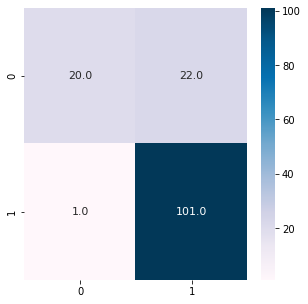

In [141]:
cm = confusion_matrix(y_test, prediction)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':11}, cmap = 'PuBu',fmt=".1f");

In [142]:
#Gaussian Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [144]:
y_pred_nb = nb_model.predict(X_test)

In [145]:
accuracy_score(y_test, y_pred_nb)

0.8194444444444444

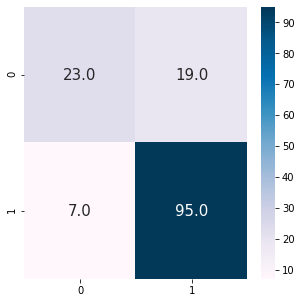

In [146]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [147]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.77      0.55      0.64        42
           1       0.83      0.93      0.88       102

    accuracy                           0.82       144
   macro avg       0.80      0.74      0.76       144
weighted avg       0.81      0.82      0.81       144



In [148]:
#KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
y_pred_knn = knn_model.predict(X_test)

In [151]:
accuracy_score(y_test, y_pred_knn)

0.6388888888888888

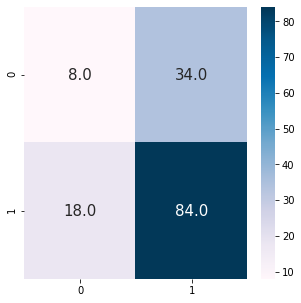

In [152]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [153]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.31      0.19      0.24        42
           1       0.71      0.82      0.76       102

    accuracy                           0.64       144
   macro avg       0.51      0.51      0.50       144
weighted avg       0.59      0.64      0.61       144



In [154]:
#Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [156]:
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8472222222222222

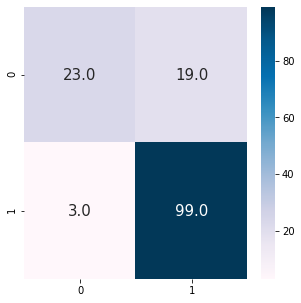

In [157]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [158]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.55      0.68        42
           1       0.84      0.97      0.90       102

    accuracy                           0.85       144
   macro avg       0.86      0.76      0.79       144
weighted avg       0.85      0.85      0.83       144



In [159]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Variable Significance Levels')

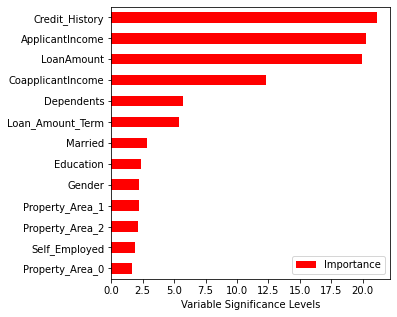

In [160]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

In [161]:
#XG Boost

In [162]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier().fit(X_train, y_train)

In [163]:
y_pred_xgb_model = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb_model)

0.8402777777777778

In [164]:
print(classification_report(y_test, y_pred_xgb_model))

              precision    recall  f1-score   support

           0       0.88      0.52      0.66        42
           1       0.83      0.97      0.90       102

    accuracy                           0.84       144
   macro avg       0.86      0.75      0.78       144
weighted avg       0.85      0.84      0.83       144



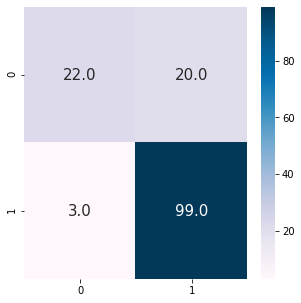

In [165]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [166]:
from xgboost import XGBClassifier
# Model Tuning
XGB_model = XGBClassifier(random_state = 42, max_depth = 8, n_estimators = 3000, 
                          reg_lambda = 1.2, reg_alpha = 1.2, 
                          min_child_weight = 1,objective = 'binary:logistic',
                         learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5,
                          eval_metric = 'auc').fit(X_train, y_train)

In [167]:
y_pred_XGB_model = XGB_model.predict(X_test)
accuracy_score(y_test, y_pred_XGB_model)

0.8333333333333334

In [168]:
print(classification_report(y_test, y_pred_XGB_model))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        42
           1       0.85      0.93      0.89       102

    accuracy                           0.83       144
   macro avg       0.81      0.76      0.78       144
weighted avg       0.83      0.83      0.83       144



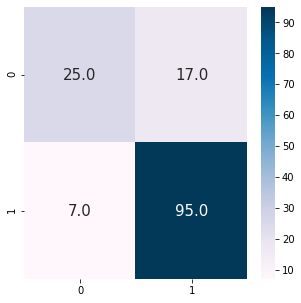

In [169]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_XGB_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [171]:
models = [
    knn_model,
    nb_model,
    xgb_model,
    XGB_model,
    rf_model,
      
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 63.8889%
----------------------------
GaussianNB:
Accuracy: 81.9444%
----------------------------
XGBClassifier:
Accuracy: 84.0278%
----------------------------
XGBClassifier:
Accuracy: 83.3333%
----------------------------
RandomForestClassifier:
Accuracy: 84.7222%
